# Context Extractor AI
This notebook contains AI model that is able to classify images into their roles (informative, decorative, functional, text, or complex). The model takes image and several text attributes as input and outputs a role.

## Load Data

In [1]:
# Install dependencies
%pip install pandas ftfy

  Using cached ftfy-6.2.3-py3-none-any.whl.metadata (7.8 kB)
Using cached ftfy-6.2.3-py3-none-any.whl (43 kB)
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.5
    Uninstalling wcwidth-0.2.5:
      Successfully uninstalled wcwidth-0.2.5
Note: you may need to restart the kernel to use updated packages.


In [46]:
import re

In [52]:
test = """    }
][][
    {
        "src": "http://mcz.edu.pl/Content/uploaded/images/kafelek%20rekrutacja.png",
        "fil
"""

sub = re.sub(r"\](\[\])*\[", ",", test)
print(sub)

    }
,
    {
        "src": "http://mcz.edu.pl/Content/uploaded/images/kafelek%20rekrutacja.png",
        "fil



In [53]:
import json
import re
json_path = "../scraper/output-aut/output.json"

try:
    # Read the JSON file
    with open(json_path, "r") as file:
        dirty_data = file.read()
        dirty_data = re.sub(r"\](\[\])*\[", ",", dirty_data)
        data = json.loads(dirty_data)

    # Print the first entry in the JSON data
    print(data[0])

    # Print the number of entries in the JSON data
    print(len(data))
    
except Exception as e:
    print(str(e))

{'src': 'https://ludacreative.com.au/wp-content/uploads/2023/12/your-property-investor-luda-logo.png', 'file_name': 'ludacreative.com.au-image_5.jpg', 'alt': 'your-property-investor-luda-logo', 'attrs': {'class': ['swiper-slide-image', 'swiper-lazy', 'swiper-lazy-loaded'], 'alt': 'your-property-investor-luda-logo', 'src': 'https://ludacreative.com.au/wp-content/uploads/2023/12/your-property-investor-luda-logo.png'}, 'a_button_parent': 'None', 'previous_texts': ["h2: We're your committed partners in the digital landscape.", 'h2: More than a web development agency.'], 'previous_texts_cutoff_by_image_index': 0, 'next_texts': ['h1: Sunshine Coast Website Design and Development Agency', 'h3: We create solutions that not only stand out, but thrive.', 'p: Blending innovative solutions in Website Design and Development and custom strategies elevated by a personable touch, Luda Creative offers an out of the box approach with an unwavering commitment to making your brand the go-to in your indust

In [3]:
# installing some dependencies, CLIP was released in PyTorch
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

# Updated to use a more recent version of PyTorch that supports newer CUDA versions
if CUDA_version in ["10.0", "10.1"]:
    torch_version_suffix = f"+cu{CUDA_version.replace('.', '')}"
elif CUDA_version == "10.2":
    torch_version_suffix = "+cu102"
elif CUDA_version in ["11.0", "11.1", "11.2", "11.3"]:
    torch_version_suffix = "+cu113"  # Assuming cu113 is compatible with CUDA 11.x versions
else:
    torch_version_suffix = "+cu116"  # Defaulting to a newer CUDA version if none of the above match

# Updated PyTorch version to a more recent one that is likely to have the desired CUDA version available
pytorch_version = "1.13.0"  # Example of a more recent version, adjust as needed

torch_version_suffix = "+cu116"  # Your CUDA version suffix

# Choose a compatible torchvision version
torchvision_version = "0.14.0"  # Example compatible version, adjust based on compatibility

%pip install torch=={pytorch_version}{torch_version_suffix} torchvision=={torchvision_version}{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

import numpy as np
import torch

print("Torch version:", torch.__version__)

CUDA version: 11.5
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu116/torch-1.13.0%2Bcu116-cp311-cp311-linux_x86_64.whl (1983.3 MB)
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.14.0+cu116 (from versions: 0.1.6, 0.2.0, 0.15.0+cpu, 0.15.0+cu117, 0.15.0+cu118, 0.15.1, 0.15.1+cpu, 0.15.1+cu117, 0.15.1+cu118, 0.15.2, 0.15.2+cpu, 0.15.2+cu117, 0.15.2+cu118, 0.15.2+rocm5.3, 0.15.2+rocm5.4.2, 0.16.0, 0.16.0+cpu, 0.16.0+cu118, 0.16.0+cu121, 0.16.0+rocm5.5, 0.16.0+rocm5.6, 0.16.1, 0.16.1+cpu, 0.16.1+cu118, 0.16.1+cu121, 0.16.1+rocm5.5, 0.16.1+rocm5.6, 0.16.2, 0.16.2+cpu, 0.16.2+cu118, 0.16.2+cu121, 0.16.2+rocm5.5, 0.16.2+rocm5.6, 0.17.0, 0.17.0+cpu, 0.17.0+cu118, 0.17.0+cu121, 0.17.0+rocm5.6, 0.17.0+rocm5.7, 0.17.1, 0.17.1+cpu, 0.17.1+cu118, 0.17.1+cu121, 0.17.1+rocm

In [4]:
# clone the CLIP repository
!git clone https://github.com/openai/CLIP.git

import sys
from pathlib import Path

try:
    clip_dir = Path(".").absolute() / "CLIP"
    sys.path.append(str(clip_dir))
    print(f"CLIP dir is: {clip_dir}")
except Exception as e:
    print(e)

import clip

fatal: destination path 'CLIP' already exists and is not an empty directory.
CLIP dir is: /home/felinejtd/projects/itb/ta/image-alt-text-ai/role_classifier/CLIP


In [5]:
# Load pre-trained model
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)
print(f"Model dir: {os.path.expanduser('~/.cache/clip')}")

Model dir: /home/felinejtd/.cache/clip


# Prep Data

In [11]:
# Shuffle the data
import random
random.shuffle(data)

In [15]:
# In order to display the image we will need to de-normalize them
image_mean = torch.tensor([0.48145466, 0.4578275, 0.40821073]).to('cpu')
image_std = torch.tensor([0.26862954, 0.26130258, 0.27577711]).to('cpu')

def denormalize_image(image: torch.Tensor) -> torch.Tensor:
    image *= image_std[:, None, None]
    image += image_mean[:, None, None]
    return image

In [ ]:
def show_results(image_features, text_features, class_names):
    # depends on global var dataset
    print(f"Image features shape: {image_features.shape}")
    print(f"Text features shape: {text_features.shape}")
    print(f"Class names: {class_names}")

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    k = np.min([len(class_names), 6])
    # top_probs, top_labels = text_probs.cpu().topk(k, dim=-1)
    text_probs = text_probs.cpu()

    plt.figure(figsize=(26, 16))

    for i, (image, label_idx) in enumerate(dataset):
        plt.subplot(4, 8, 2 * i + 1)
        plt.imshow(denormalize_image(image).permute(1, 2, 0))
        plt.axis("off")

        plt.subplot(4, 8, 2 * i + 2)
        y = np.arange(k)
        plt.grid()
        plt.barh(y, text_probs[i])
        plt.gca().invert_yaxis()
        plt.gca().set_axisbelow(True)
        # plt.yticks(y, [class_names[index] for index in top_labels[i].numpy()])
        plt.yticks(y, class_names)
        plt.xlabel("probability")

    plt.subplots_adjust(wspace=0.5)
    plt.show()

# Begin Eval

In [61]:
import matplotlib.pyplot as plt
from PIL import Image

image_dir = "../scraper/output-aut/images/"

number_of_images = 1000
threshold = 0.5

init = {"is_relevant": 0, "num_data": 0}

max_similarity = 0
min_similarity = 100
prev_text_evals = [init.copy() for _ in range(5)]
next_text_evals = [init.copy() for _ in range(5)]

# prev_text_evals = [0 for _ in range(5)]
# next_text_evals = [0 for _ in range(5)]

for image in data[0:number_of_images]:
    try:
        class_captions = image["previous_texts"]
        # Cut all the captions to the same length
        class_captions = ["This image can be associated with: " + caption[:200] for caption in class_captions]
        text_input = clip.tokenize(class_captions).to(device)

        with torch.no_grad():
            text_features = model.encode_text(text_input).float()
            text_features /= text_features.norm(dim=-1, keepdim=True)
        
        image_path = image["file_name"]
        # Load the image
        image_input = transform(Image.open(image_dir + image_path)).unsqueeze(0).to(device)
        # Encode the image
        with torch.no_grad():
            image_features = model.encode_image(image_input).float()
            image_features /= image_features.norm(dim=-1, keepdim=True)

        # Display the results
        text_probs = (100.0 * image_features @ text_features.T)
        text_probs = text_probs.cpu()
        print("Prev: ", text_probs)

        # Save the results
        for i, class_caption in enumerate(class_captions):
            if text_probs[0][i].item() > max_similarity:
                max_similarity = text_probs[0][i].item()
            if text_probs[0][i].item() < min_similarity:
                min_similarity = text_probs[0][i].item()
            if text_probs[0][i].item() > threshold:
                prev_text_evals[i]["is_relevant"] += 1
            prev_text_evals[i]["num_data"] += 1

        # Next text
        class_captions = image["next_texts"]
        # Cut all the captions to the same length
        class_captions = ["This image can be associated with: " + caption[:200] for caption in class_captions]
        text_input = clip.tokenize(class_captions).to(device)

        with torch.no_grad():
            text_features = model.encode_text(text_input).float()
            text_features /= text_features.norm(dim=-1, keepdim=True)

        # Display the results
        text_probs = (100.0 * image_features @ text_features.T)
        text_probs = text_probs.cpu()
        print("Next: ", text_probs)

        # Save the results
        for i, class_caption in enumerate(class_captions):
            if text_probs[0][i].item() > max_similarity:
                max_similarity = text_probs[0][i].item()
            if text_probs[0][i].item() < min_similarity:
                min_similarity = text_probs[0][i].item()
            if text_probs[0][i].item() > threshold:
                next_text_evals[i]["is_relevant"] += 1
            next_text_evals[i]["num_data"] += 1

    except Exception as e:
        print(str(e))

# Calculate the percentage
for i in range(5):
    prev_text_evals[i]["is_relevant"] = (prev_text_evals[i]["is_relevant"] / prev_text_evals[i]["num_data"]) * 100
    next_text_evals[i]["is_relevant"] = (next_text_evals[i]["is_relevant"] / next_text_evals[i]["num_data"]) * 100

print("Previous text evaluations:")
print(prev_text_evals)
print("Next text evaluations:")
print(next_text_evals)

SyntaxError: invalid syntax (2759656362.py, line 83)

In [59]:
print(max_similarity)

39.049739837646484


In [60]:
print(min_similarity)

1


In [7]:
text_input = clip.tokenize(class_captions).to(device)
print(f"Tokens shape: {text_input.shape}")

with torch.no_grad():
    text_features = model.encode_text(text_input).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)
print(f"Text features shape: {text_features.shape}")

Tokens shape: torch.Size([6, 77])
Text features shape: torch.Size([6, 512])


# Prepare Images

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [27]:
dataset = ImageFolder(root="../scraper/images", transform=transform)
data_batches = DataLoader(dataset, batch_size=len(dataset), shuffle=False)

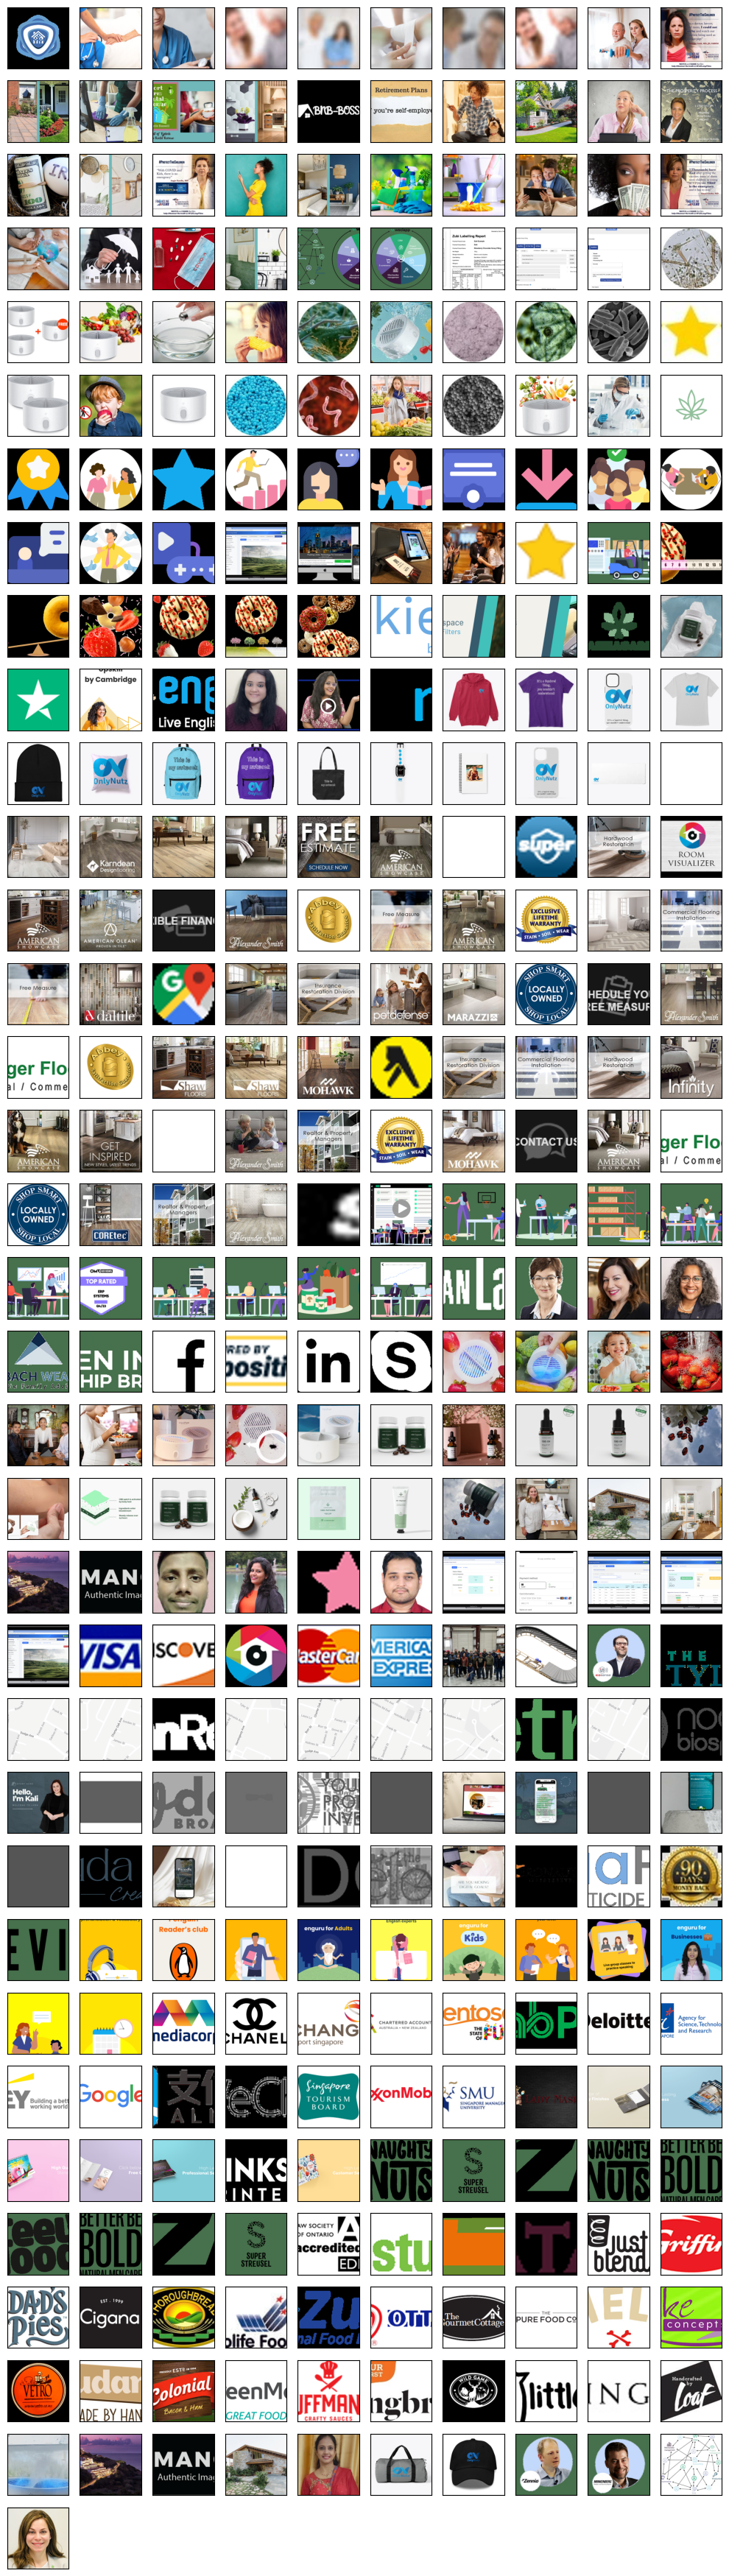

In [39]:
plt.figure(figsize=(10, 100))

# Show all images from the dataset since our dataset is small
# try:
for idx, (image, label_idx) in enumerate(dataset):
    # cur_class = class_names[label_idx]

    try:
        plt.subplot(100, 10, idx+1)
        plt.imshow(denormalize_image(image).permute(1, 2, 0))
        # plt.title(f"{cur_class}")
        plt.xticks([])
        plt.yticks([])
    except Exception as e:
        pass
# except Exception as e:
#     pass

plt.tight_layout()

In [30]:
# read out all images and true labels
image_input, y_true = next(iter(data_batches))
image_input = image_input.to(device)

with torch.no_grad():
    image_features = model.encode_image(image_input).float()


In [72]:
def show_results(image_features, text_features, class_names):
    # depends on global var dataset
    print(f"Image features shape: {image_features.shape}")
    print(f"Text features shape: {text_features.shape}")
    print(f"Class names: {class_names}")

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    k = np.min([len(class_names), 6])
    # top_probs, top_labels = text_probs.cpu().topk(k, dim=-1)
    text_probs = text_probs.cpu()

    plt.figure(figsize=(26, 16))

    for i, (image, label_idx) in enumerate(dataset):
        plt.subplot(4, 8, 2 * i + 1)
        plt.imshow(denormalize_image(image).permute(1, 2, 0))
        plt.axis("off")

        plt.subplot(4, 8, 2 * i + 2)
        y = np.arange(k)
        plt.grid()
        plt.barh(y, text_probs[i])
        plt.gca().invert_yaxis()
        plt.gca().set_axisbelow(True)
        # plt.yticks(y, [class_names[index] for index in top_labels[i].numpy()])
        plt.yticks(y, class_names)
        plt.xlabel("probability")

    plt.subplots_adjust(wspace=0.5)
    plt.show()

Image features shape: torch.Size([341, 512])
Text features shape: torch.Size([6, 512])
Class names: ['complex', 'decorative', 'functional', 'informative', 'other', 'text']


/home/felinejtd/.local/lib/python3.10/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


ValueError: num must be an integer with 1 <= num <= 32, not 33

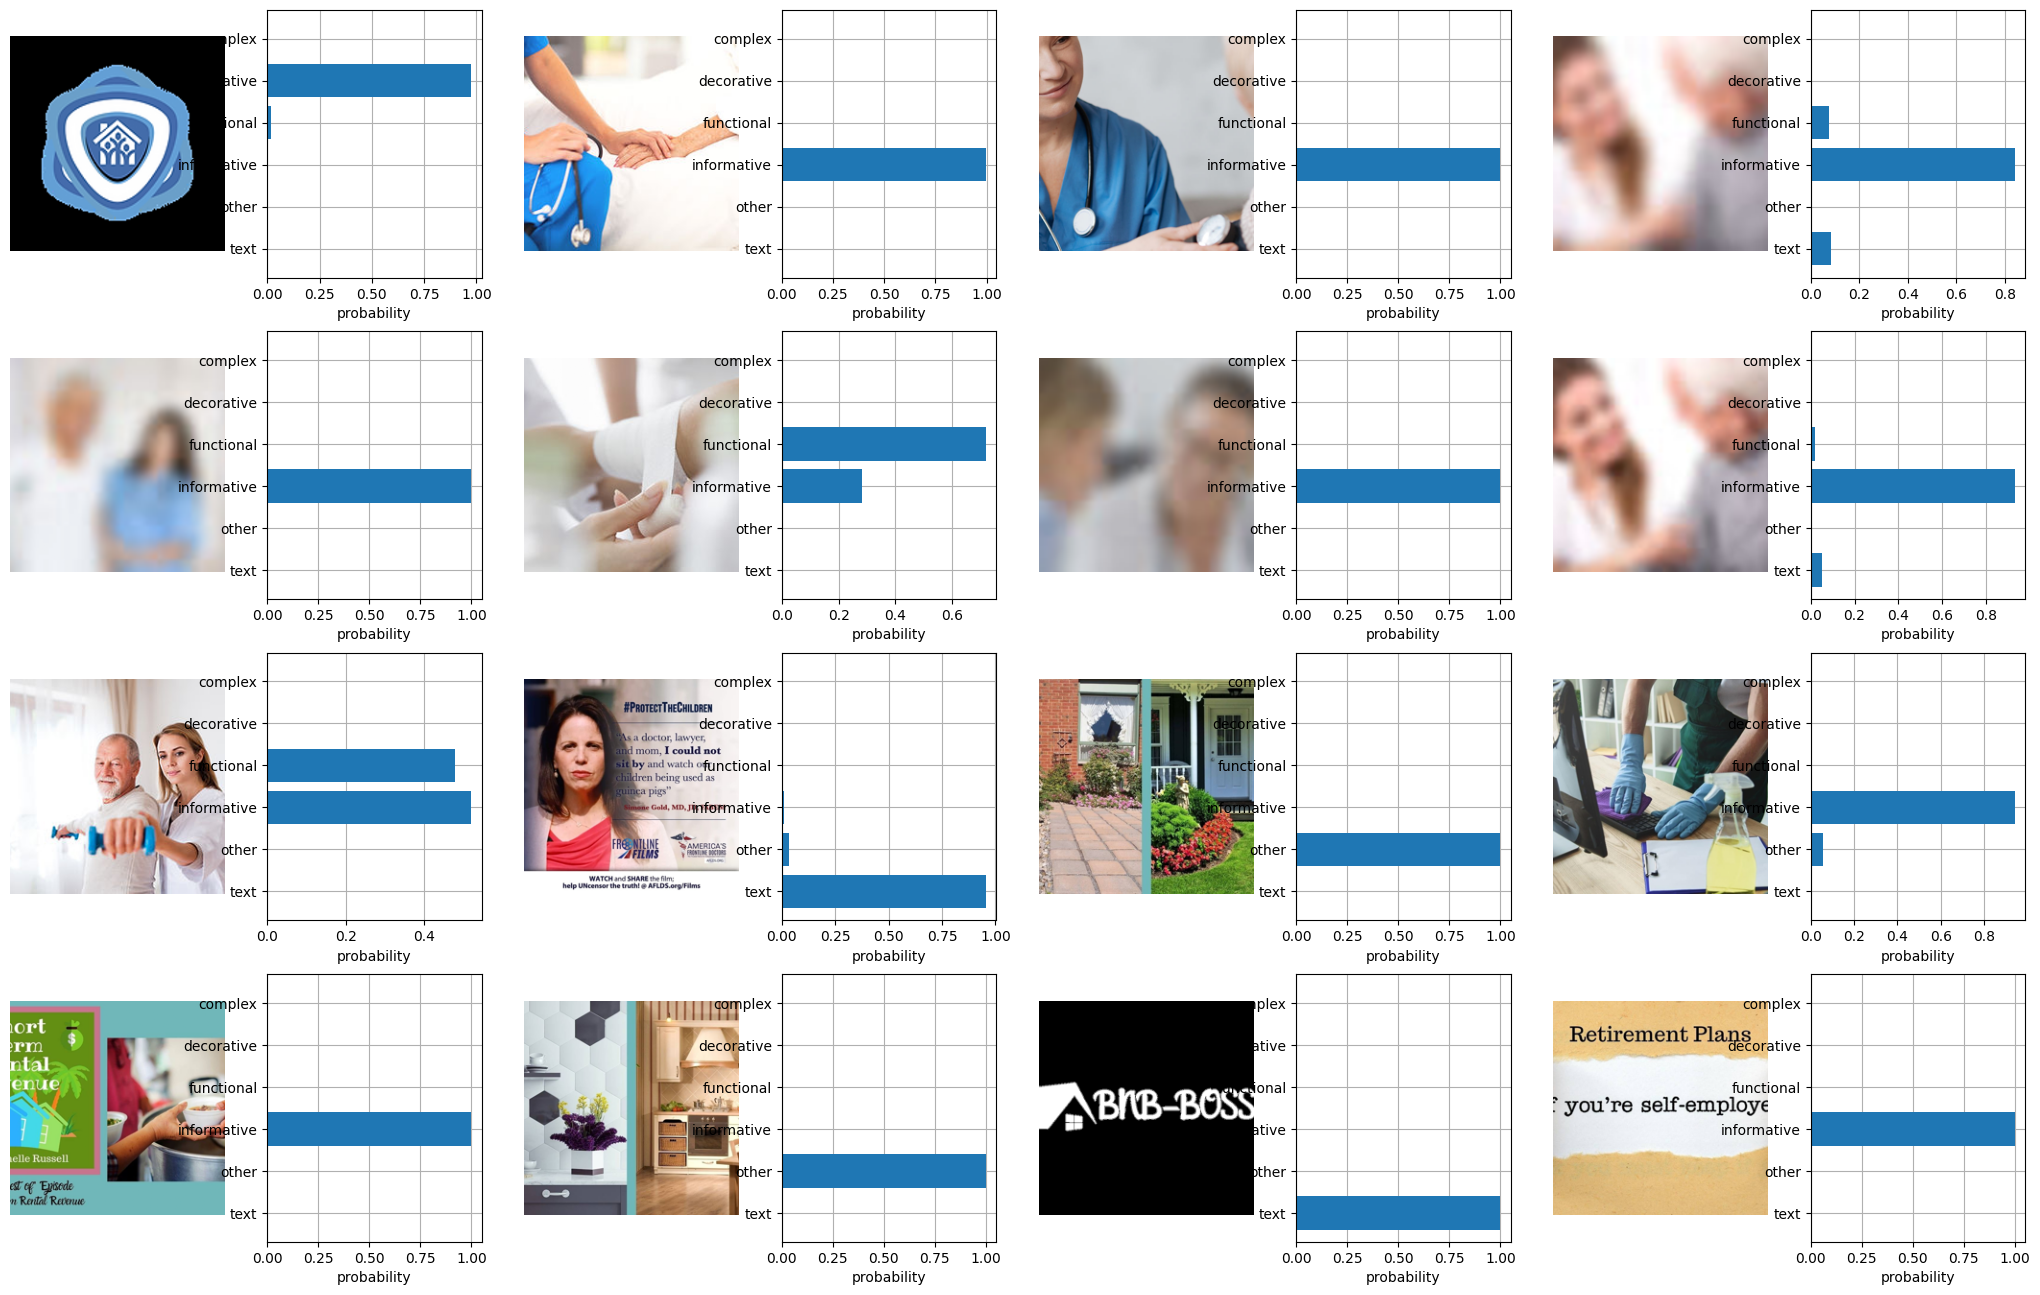

In [73]:
show_results(image_features, text_features, class_names)

In [12]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and preprocess the image
image = Image.open("path/to/your/image.jpg")

# Prepare the text
text = "A description of the image"

# Preprocess the image and text
inputs = processor(text=[text], images=image, return_tensors="pt", padding=True)

# Encode the image and text
with torch.no_grad():
    outputs = model(**inputs)
    image_embeddings = outputs.image_embeds
    text_embeddings = outputs.text_embeds

# Normalize the embeddings
image_embeddings = image_embeddings / image_embeddings.norm(p=2, dim=-1, keepdim=True)
text_embeddings = text_embeddings / text_embeddings.norm(p=2, dim=-1, keepdim=True)

print("Image Embeddings:", image_embeddings)
print("Text Embeddings:", text_embeddings)

/home/felinejtd/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: '/home/felinejtd/projects/itb/ta/image-alt-text-ai/role_classifier/path/to/your/image.jpg'